In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,accuracy_score

In [92]:
iris = datasets.load_iris()
X = iris.data[:,2:4]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_new = np.vstack((X_train,X_test))
y_new = np.hstack((y_train, y_test))

In [62]:
#linear kernel
C = [0.01,0.1,1,10,100]

for c in C:
        svm_linear =  svm.SVC(kernel = 'linear', C = c , random_state = 0)
        svm_linear.fit(X_train,y_train)
    
        y_pred = svm_linear.predict(X_test)
        print('\nC =',c)
        print("Accuracy : ",accuracy_score(y_test,y_pred))
        print("F1_score : ",f1_score(y_test, y_pred,average='weighted'))



C = 0.01
Accuracy :  0.6
F1_score :  0.48267288267288266

C = 0.1
Accuracy :  0.9555555555555556
F1_score :  0.9555555555555556

C = 1
Accuracy :  0.9777777777777777
F1_score :  0.9779434092477569

C = 10
Accuracy :  0.9777777777777777
F1_score :  0.9775489775489775

C = 100
Accuracy :  0.9777777777777777
F1_score :  0.9775489775489775


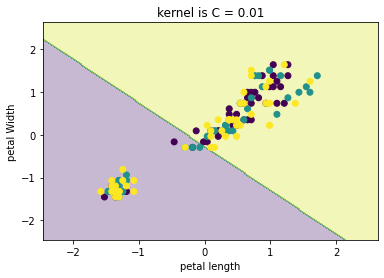

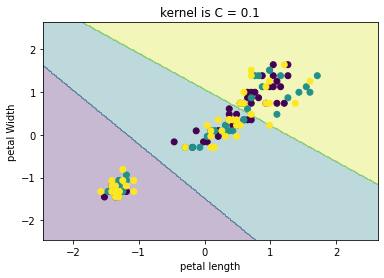

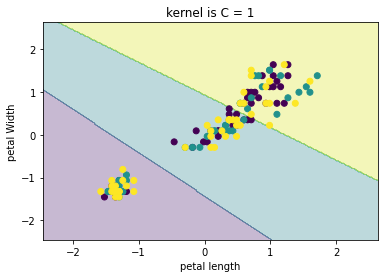

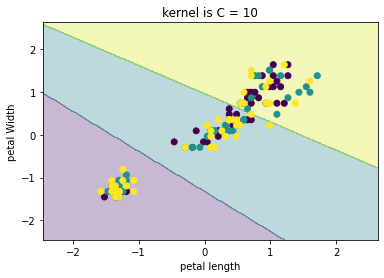

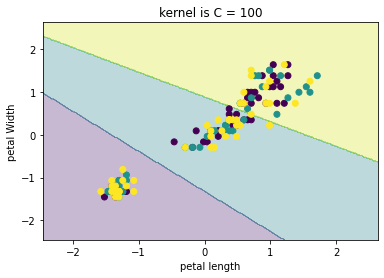

In [64]:
for c in C:
    svc = svm.SVC(kernel='linear', C=c).fit(X_train, y_train)
    x_min, x_max = X_new[:, 0].min() - 1, X_new[:, 0].max() + 1
    y_min, y_max = X_new[:, 1].min() - 1, X_new[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max,0.02))
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y)
    plt.xlabel('petal length')
    plt.ylabel('petal Width')
    plt.xlim(xx.min(), xx.max())
    plt.xlim(yy.min(), yy.max())
    plt.title('kernel is C = %s'%c)
    plt.show()

In [65]:
#polynomial Kernel
C=[2,15,40]
degree=[3,9,15]
for c in C:
    for d in degree:
        svm_polynomial =  svm.SVC(kernel = 'poly', degree = d, C = c, random_state = 0)
        svm_polynomial.fit(X_train,y_train)
        y_pred = svm_polynomial.predict(X_test)
            
        print('\nC=',c , ',degree=',d)
        print("Accuracy : ",accuracy_score(y_test,y_pred))
        print("F1_score : ",f1_score(y_test, y_pred,average='micro'))



C= 2 ,degree= 3
Accuracy :  0.9777777777777777
F1_score :  0.9777777777777777

C= 2 ,degree= 9
Accuracy :  0.8888888888888888
F1_score :  0.8888888888888888

C= 2 ,degree= 15
Accuracy :  0.8888888888888888
F1_score :  0.8888888888888888

C= 15 ,degree= 3
Accuracy :  0.9777777777777777
F1_score :  0.9777777777777777

C= 15 ,degree= 9
Accuracy :  0.9333333333333333
F1_score :  0.9333333333333333

C= 15 ,degree= 15
Accuracy :  0.8888888888888888
F1_score :  0.8888888888888888

C= 40 ,degree= 3
Accuracy :  0.9777777777777777
F1_score :  0.9777777777777777

C= 40 ,degree= 9
Accuracy :  0.9333333333333333
F1_score :  0.9333333333333333

C= 40 ,degree= 15
Accuracy :  0.9111111111111111
F1_score :  0.9111111111111111


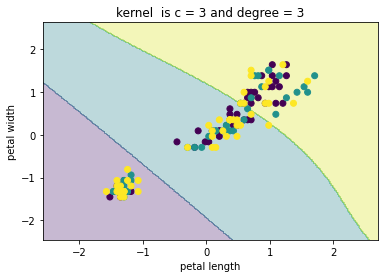

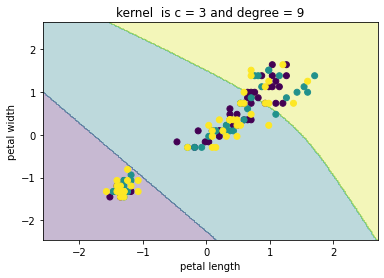

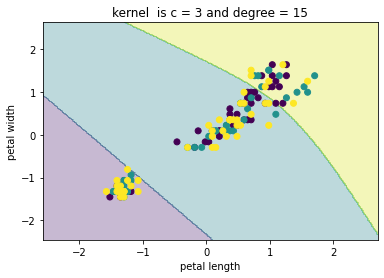

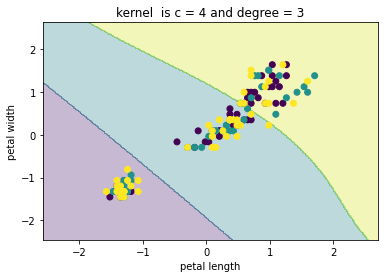

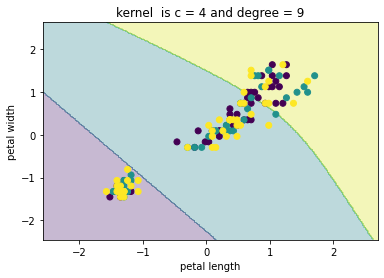

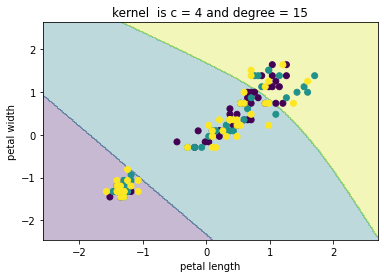

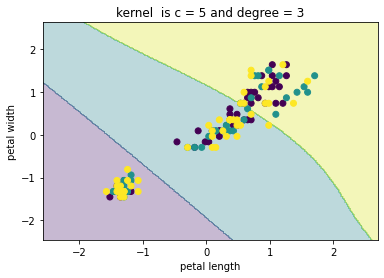

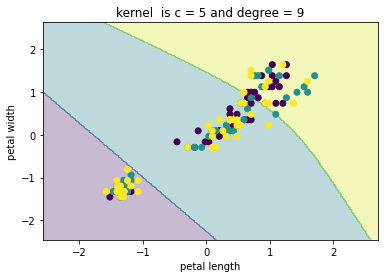

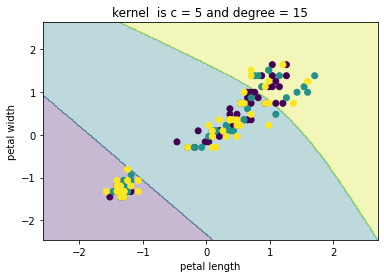

In [93]:
for c in C:
    for deg in degree:
        svc = svm.SVC(kernel='poly',degree=deg,C=c).fit(X_train, y_train)
        x_min, x_max = X_new[:, 0].min() - 1, X_new[:, 0].max() + 1
        y_min, y_max = X_new[:, 1].min() - 1, X_new[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02))
        plt.subplot(1, 1, 1)
        Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3)
        plt.scatter(X_new[:, 0], X_new[:, 1], c=y)
        plt.xlabel('petal length')
        plt.ylabel('petal width')
        plt.xlim(xx.min(), xx.max())
        plt.title('kernel  is c = %s and degree = %s'%(c,deg))
        plt.show()

In [69]:
# RBF Kernel
C=[0.8,10,100]
gamma=[4,10,6]
for c in C:
    for g in gamma:
        svm_rbf =  svm.SVC(kernel = 'rbf', gamma=g, C = c, random_state = 0)
        svm_rbf.fit(X_train,y_train)
        y_pred = svm_rbf.predict(X_test)
        print('\nC=',c , ',gamma=',g)
        print("Accuracy : ",accuracy_score(y_test,y_pred))
        print("F1_score : ",f1_score(y_test, y_pred,average='micro'))
        


C= 0.8 ,gamma= 4
Accuracy :  0.9777777777777777
F1_score :  0.9777777777777777

C= 0.8 ,gamma= 10
Accuracy :  1.0
F1_score :  1.0

C= 0.8 ,gamma= 6
Accuracy :  0.9777777777777777
F1_score :  0.9777777777777777

C= 10 ,gamma= 4
Accuracy :  0.9777777777777777
F1_score :  0.9777777777777777

C= 10 ,gamma= 10
Accuracy :  1.0
F1_score :  1.0

C= 10 ,gamma= 6
Accuracy :  0.9777777777777777
F1_score :  0.9777777777777777

C= 100 ,gamma= 4
Accuracy :  0.9777777777777777
F1_score :  0.9777777777777777

C= 100 ,gamma= 10
Accuracy :  0.9777777777777777
F1_score :  0.9777777777777777

C= 100 ,gamma= 6
Accuracy :  0.9111111111111111
F1_score :  0.9111111111111111


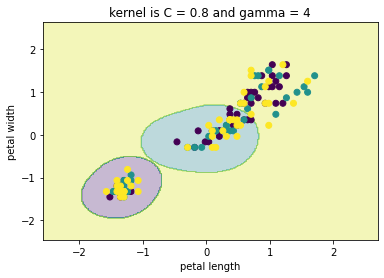

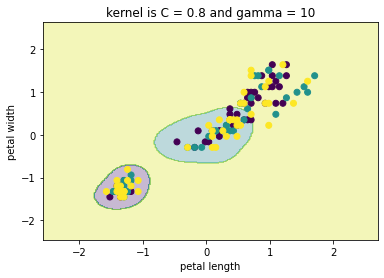

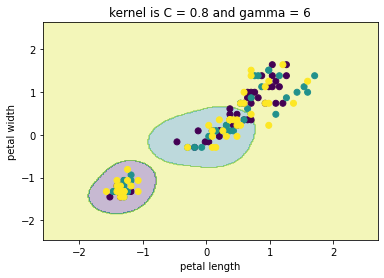

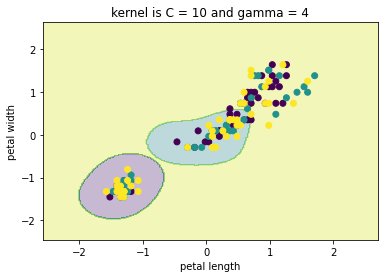

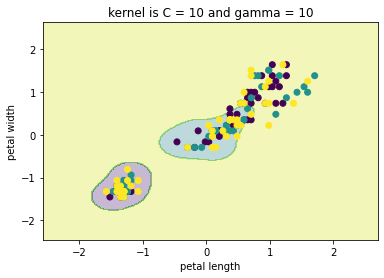

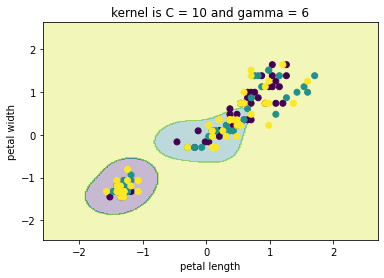

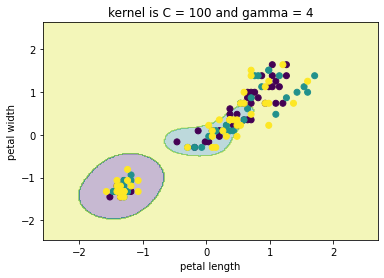

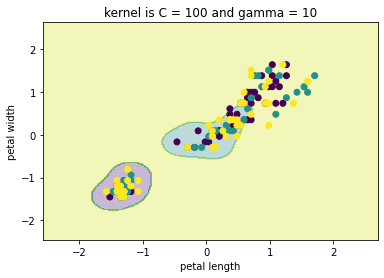

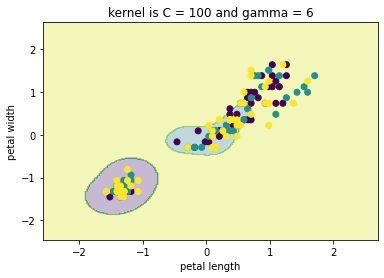

In [72]:
for c in C:
    for g in gamma:
        svc = svm.SVC(kernel='rbf',gamma=g, C=c).fit(X_train, y_train)
        x_min, x_max = X_new[:, 0].min() - 1, X_new[:, 0].max() + 1
        y_min, y_max = X_new[:, 1].min() - 1, X_new[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02))
        plt.subplot(1, 1, 1)
        Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z,  alpha=0.3)
        plt.scatter(X_new[:, 0], X_new[:, 1], c=y)
        plt.xlabel('petal length')
        plt.ylabel('petal width')
        plt.xlim(xx.min(), xx.max())
        plt.title('kernel is C = %s and gamma = %s'%(c,g))
        plt.show()


In [90]:
# Sigmoid Kernel
C=[3,4,5]
gamma=[0.1,2,5]
for c in C:
    for g in gamma:
        svm_sigmoid =  svm.SVC(kernel = 'sigmoid', gamma=g, C = c, random_state = 0)
        svm_sigmoid.fit(X_train,y_train)
        y_pred = svm_sigmoid.predict(X_test)
        print('\nC =',c , ',gamma = ',g)
        print("Accuracy : ",accuracy_score(y_test,y_pred))
        print("F1_score : ",f1_score(y_test, y_pred,average='micro'))



C = 3 ,gamma =  0.1
Accuracy :  0.9777777777777777
F1_score :  0.9777777777777777

C = 3 ,gamma =  2
Accuracy :  0.5555555555555556
F1_score :  0.5555555555555556

C = 3 ,gamma =  5
Accuracy :  0.5333333333333333
F1_score :  0.5333333333333333

C = 4 ,gamma =  0.1
Accuracy :  0.9777777777777777
F1_score :  0.9777777777777777

C = 4 ,gamma =  2
Accuracy :  0.5555555555555556
F1_score :  0.5555555555555556

C = 4 ,gamma =  5
Accuracy :  0.5333333333333333
F1_score :  0.5333333333333333

C = 5 ,gamma =  0.1
Accuracy :  0.9777777777777777
F1_score :  0.9777777777777777

C = 5 ,gamma =  2
Accuracy :  0.5333333333333333
F1_score :  0.5333333333333333

C = 5 ,gamma =  5
Accuracy :  0.5333333333333333
F1_score :  0.5333333333333333


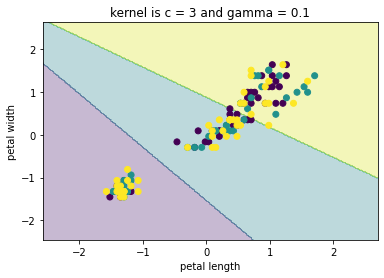

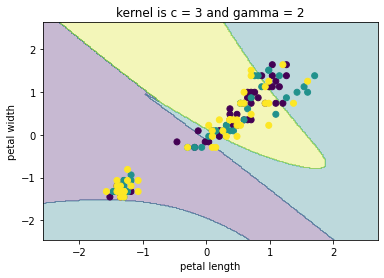

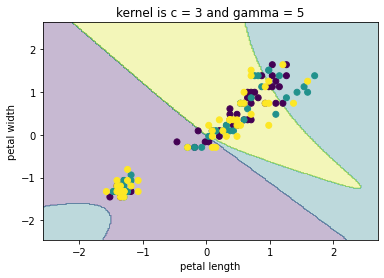

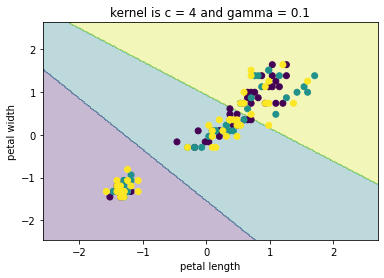

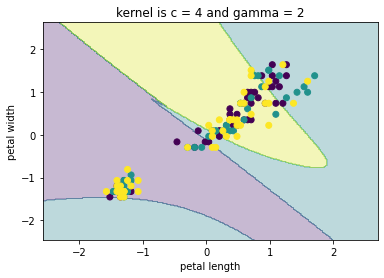

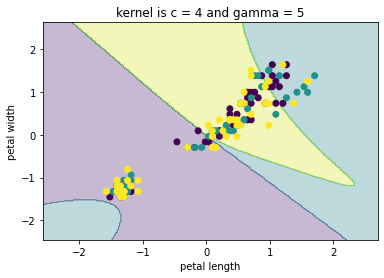

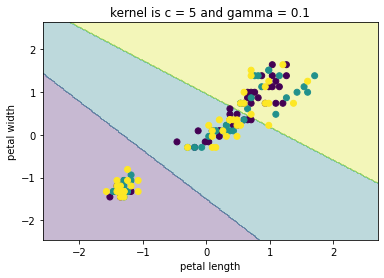

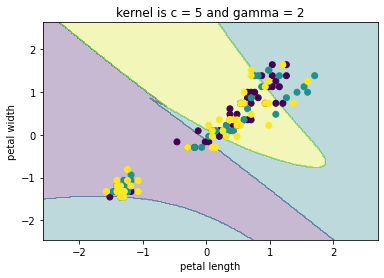

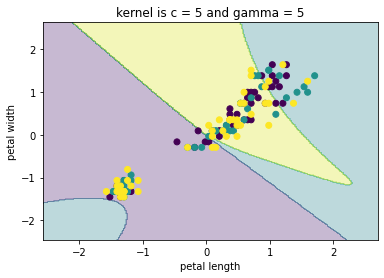

In [94]:
for c in C:
    for g in gamma:
        svc = svm.SVC(kernel='sigmoid', C=c,gamma=g).fit(X_train, y_train)
        x_min, x_max = X_new[:, 0].min() - 1, X_new[:, 0].max() + 1
        y_min, y_max = X_new[:, 1].min() - 1, X_new[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02))
        plt.subplot(1, 1, 1)
        Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3)
        plt.scatter(X_new[:, 0], X_new[:, 1], c=y)
        plt.xlabel('petal length')
        plt.ylabel('petal width')
        plt.xlim(xx.min(), xx.max())
        plt.title('kernel is c = %s and gamma = %s'%(c,g))
        plt.show()
